In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

# import warnings
# warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv("creditcard.csv")

In [30]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [33]:
df['Amount'].sort_values(ascending=False)

274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
            ...   
242261        0.00
231211        0.00
207747        0.00
190081        0.00
8346          0.00
Name: Amount, Length: 284807, dtype: float64

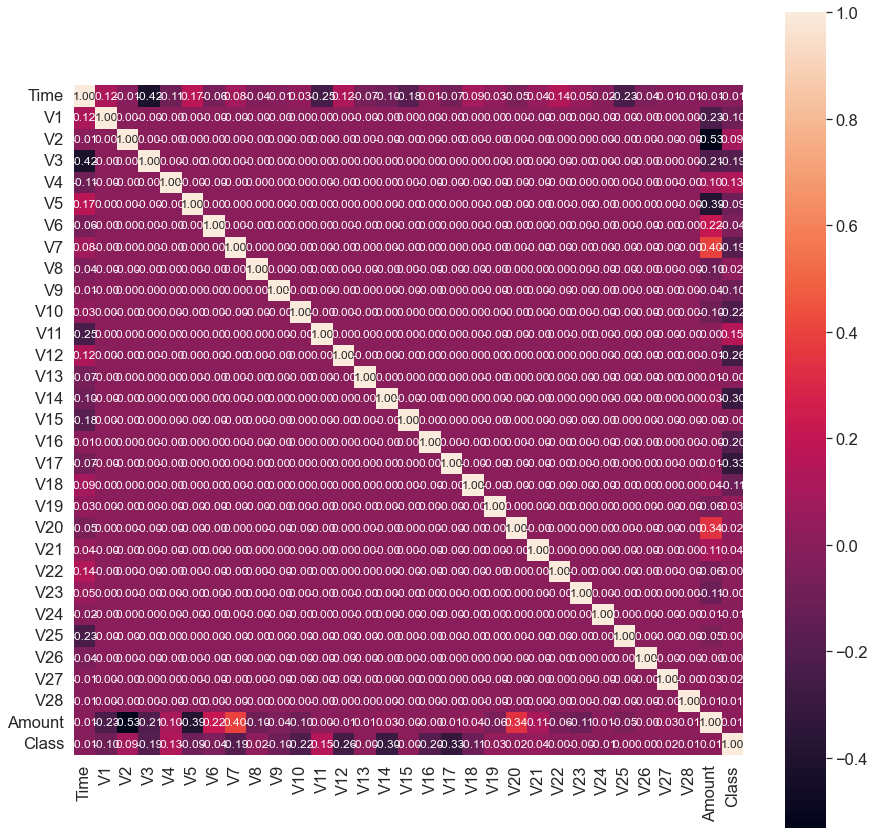

In [34]:
corr=df.corr()
col=df.columns
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(corr,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},yticklabels=col,xticklabels=col)
plt.show()

<AxesSubplot:xlabel='Amount'>

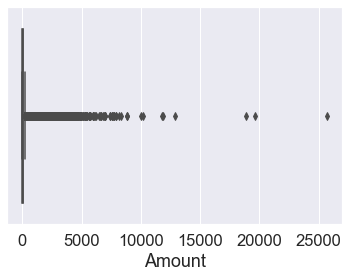

In [35]:
sns.boxplot(data=df, x='Amount')

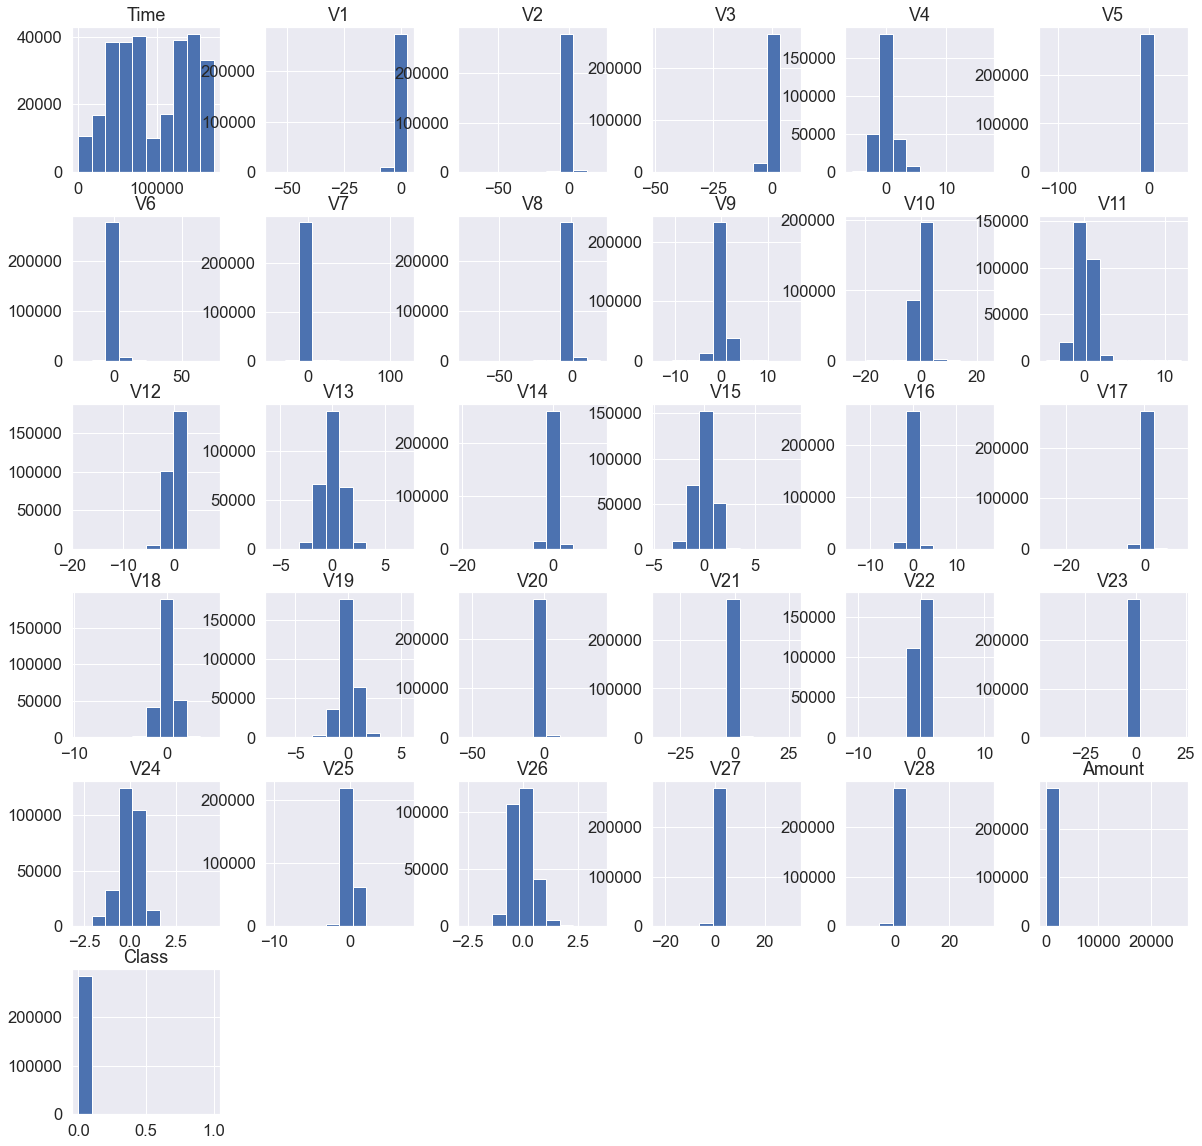

In [36]:
df.hist(figsize=(20, 20))
plt.show()

<AxesSubplot:>

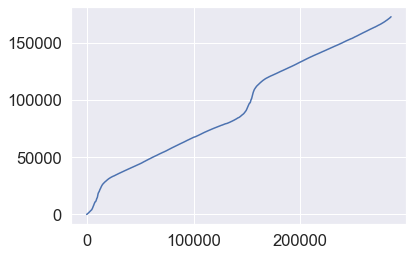

In [37]:
df['Time'].plot()

#The time column gives the transaction time distance from the first data in the dataset.
#It is aggregative. Instead of this we are creating new column that gives us the transaction time difference from 1 data before itself.

In [38]:
# df['Change']  = df['Time'].pct_change()

In [41]:
def get_fig_and_axes_list(plot_count, column_number=2):
    """
    This function takes in the number of subplots to be plotted and the desired number of columns for the subplot grid. 
    It then calculates the number of rows required and generates a matplotlib figure with the given number of subplots 
    in a grid with the desired number of columns.
    
    Args:
    - plot_count: int, the number of subplots to be plotted
    - column_number: int, the number of columns in the subplot grid. Default value is 2.
    
    Returns:
    - fig: matplotlib Figure object, the generated figure
    - axes_list: list of matplotlib Axes objects, the axes of the subplots in the figure
    """
    reminder_num = plot_count % column_number
    row_num = (plot_count // column_number) + (reminder_num > 0)
    axes_list = []
    row_number_alignment = np.ones((row_num, column_number), dtype="int")
    if reminder_num != 0:
        row_number_alignment[-1,-(column_number - reminder_num):] = 0
    coefficient = (3.5 if plot_count==1 else 4.2)
    col_size = coefficient*column_number
    row_size = coefficient*row_num
    fig = plt.figure(figsize=(col_size, row_size), layout="constrained")
    spec = fig.add_gridspec(row_num, column_number)
    for i in range(row_num):
        for j in range(column_number):
            if row_number_alignment[i,j] == 1:
                ax = fig.add_subplot(spec[i,j])
                axes_list.append(ax)
    return fig,axes_list

In [39]:
def get_axes_list(length, column_number=2):
    fig, axes_list = get_fig_and_axes_list(length, column_number=column_number )
    return axes_list

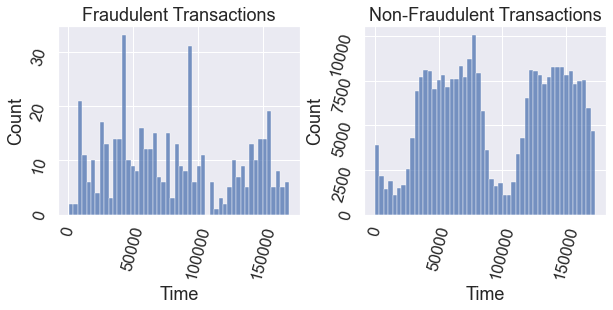

In [42]:
axes = get_axes_list(2,2)
trans_plots = []
trans_plots.append(sns.histplot(df["Time"][df.Class == 1], bins=50, ax=axes[0]))
trans_plots[0].set_title("Fraudulent Transactions")
trans_plots[0].tick_params(labelrotation=75)
trans_plots.append(sns.histplot(df["Time"][df.Class == 0], bins=50, ax=axes[1]))
trans_plots[1].set_title("Non-Fraudulent Transactions")
trans_plots[1].tick_params(labelrotation=75)
plt.show()

In [43]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Ash\AppData\Local\Temp\ipykernel_15924\844214064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


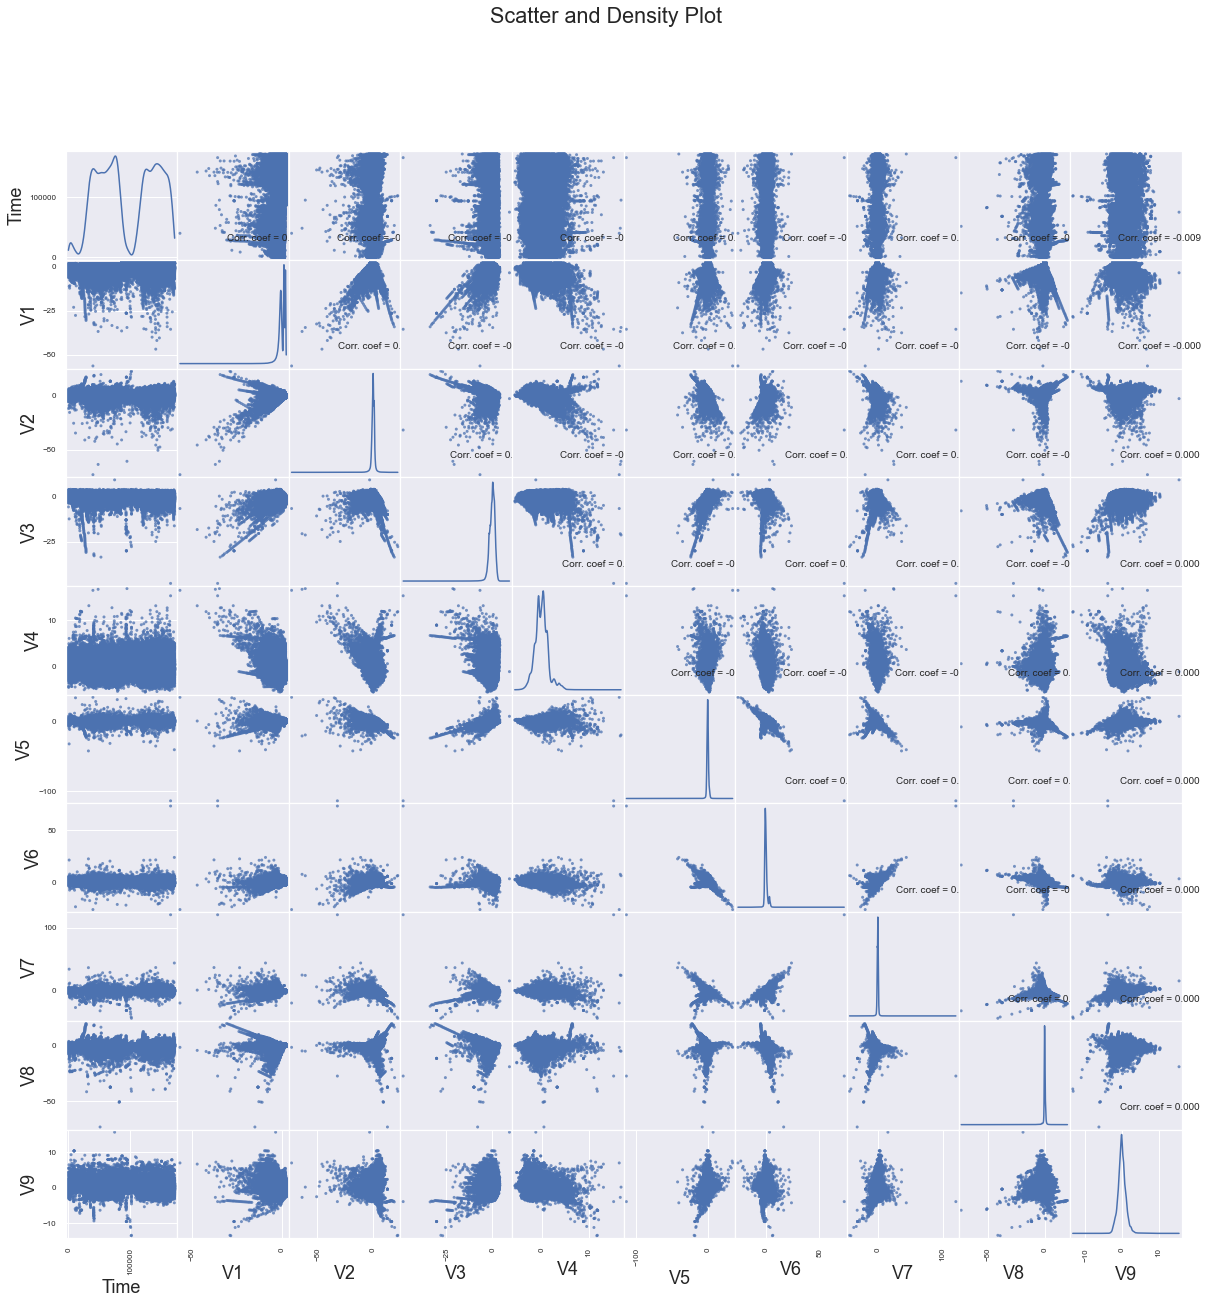

In [44]:
plotScatterMatrix(df, 20, 10)

In [46]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [47]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [1]:
# from sklearn.metrics import f1_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3, 4, 5, 6, 7, 8],
#     'min_samples_split': [2, 3, 4, 5],
#     'min_samples_leaf': [1, 2, 3, 4]
# }

# dtc = DecisionTreeClassifier()
# grid_search = GridSearchCV(dtc, param_grid, cv=5)

# grid_search.fit(X, y)

# print(grid_search.best_params_)
# print(grid_search.best_score_)



<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

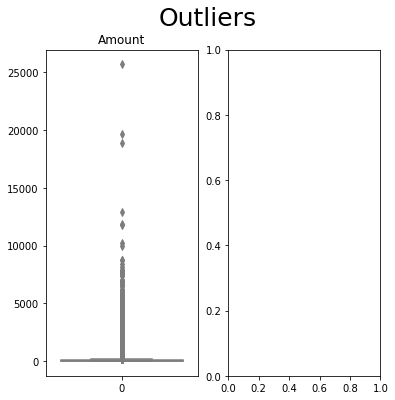

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('creditcard.csv')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)
sns.boxplot(ax=axes[0], data=df['Amount'], color="#a2d2ff").set_title("Amount")

plt.tight_layout

In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# load the credit card dataset into a Pandas dataframe
df2 = pd.read_csv('creditcard.csv')

# separate the target variable (class) from the features
X = df2.drop(['Class'], axis=1)
y = df2['Class']

# instantiate the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01),max_features=0.1)

# fit the model to the data
iso_forest.fit(df2)

scores=iso_forest.decision_function(df2)

# predict the anomalies (outliers)
y_pred = iso_forest.predict(df2)


df2['scores']=scores

# add the predicted labels to the original dataframe
df2['IsOutlier'] = y_pred

# print the number of anomalies detected
print("Number of anomalies detected:", sum(df2['IsOutlier'] == -1))


c:\Users\Ash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of anomalies detected: 2849


In [22]:
a=0

for i in range(len(df2['Class'])):

    if(df2['IsOutlier'][i]==-1 and df2['Class'][i]==1):
        a+=1

print(a)

0


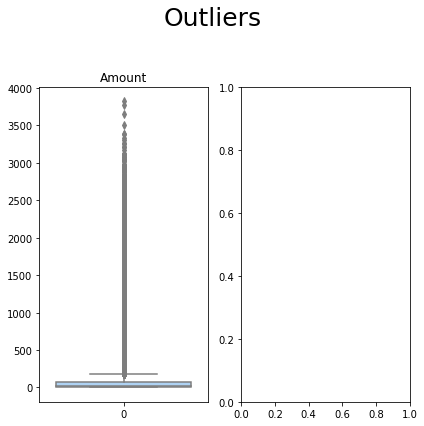

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

anomaly = df2.loc[df2['IsOutlier']==-1]
anomaly_index = list(anomaly.index)
# print('Total number of outliers is:', len(anomaly))

df2 = df2.drop(anomaly_index, axis = 0).reset_index(drop=True)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df2['Amount'], color="#a2d2ff").set_title("Amount")
# sns.boxplot(ax=axes[1], data=df2['Frequency'], color="#a2d2ff").set_title("Frequency")

plt.tight_layout()